In [ ]:
from google.colab import files
files.upload()  # Choose the kaggle.json file

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"oluwemimoayodeji","key":"0df098a9cfa45df618eb6bfd439670f0"}'}

In [ ]:
!pip install -q kaggle

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d jillanisofttech/market-segmentation-in-insurance-unsupervised

Dataset URL: https://www.kaggle.com/datasets/jillanisofttech/market-segmentation-in-insurance-unsupervised
License(s): DbCL-1.0


In [ ]:
!unzip market-segmentation-in-insurance-unsupervised.zip

Archive:  market-segmentation-in-insurance-unsupervised.zip
  inflating: Customer Data.csv       


In [ ]:
import pandas as pd

df = pd.read_csv('Customer Data.csv')
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [ ]:
df.shape

(8950, 18)

In [ ]:
df.isnull().sum()

,0
CUST_ID,0
BALANCE,0
BALANCE_FREQUENCY,0
PURCHASES,0
ONEOFF_PURCHASES,0
INSTALLMENTS_PURCHASES,0
CASH_ADVANCE,0
PURCHASES_FREQUENCY,0
ONEOFF_PURCHASES_FREQUENCY,0
PURCHASES_INSTALLMENTS_FREQUENCY,0


In [ ]:
# drop all null values
df.dropna(inplace=True)
df.isnull().sum()

,0
CUST_ID,0
BALANCE,0
BALANCE_FREQUENCY,0
PURCHASES,0
ONEOFF_PURCHASES,0
INSTALLMENTS_PURCHASES,0
CASH_ADVANCE,0
PURCHASES_FREQUENCY,0
ONEOFF_PURCHASES_FREQUENCY,0
PURCHASES_INSTALLMENTS_FREQUENCY,0


In [ ]:
#check for duplicated values
df.duplicated().sum()

np.int64(0)

In [ ]:
df = df.drop('CUST_ID', axis=1)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Create an instance of MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the data
norm_df = scaler.fit_transform(df)

# Convert the result back to a DataFrame if needed
norm_df = pd.DataFrame(norm_df, columns=df.columns)

# Display the first few rows
norm_df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,0.002148,0.818182,0.001945,0.000000,0.004240,0.000000,0.166667,0.000000,0.083333,0.000000,0.00000,0.005587,0.031720,0.003978,0.001826,0.000000,1.0
1,0.168169,0.909091,0.000000,0.000000,0.000000,0.136685,0.000000,0.000000,0.000000,0.166667,0.03252,0.000000,0.232053,0.080892,0.014034,0.222222,1.0
2,0.131026,1.000000,0.015766,0.018968,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.00000,0.033520,0.248748,0.012263,0.008210,0.000000,1.0
3,0.042940,1.000000,0.000326,0.000393,0.000000,0.000000,0.083333,0.083333,0.000000,0.000000,0.00000,0.002793,0.038397,0.013373,0.003204,0.000000,1.0
4,0.095038,1.000000,0.027188,0.000000,0.059257,0.000000,0.666667,0.000000,0.583333,0.000000,0.00000,0.022346,0.058431,0.027602,0.031506,0.000000,1.0


In [ ]:
from sklearn.cluster import KMeans

# use this to determine the number of clusters(labels)
inertia = []
for i in range(1,11):
  kmeans = KMeans(n_clusters=i, random_state=42).fit(norm_df)
  inertia.append(kmeans.inertia_)

In [ ]:
inertia

[5638.904080164896,
 3300.7150608010807,
 2739.027245663395,
 2423.226949763306,
 2209.6177470021407,
 1947.7564445016149,
 1762.5208718415283,
 1779.8179142430602,
 1538.16108274587,
 1424.9367414412434]

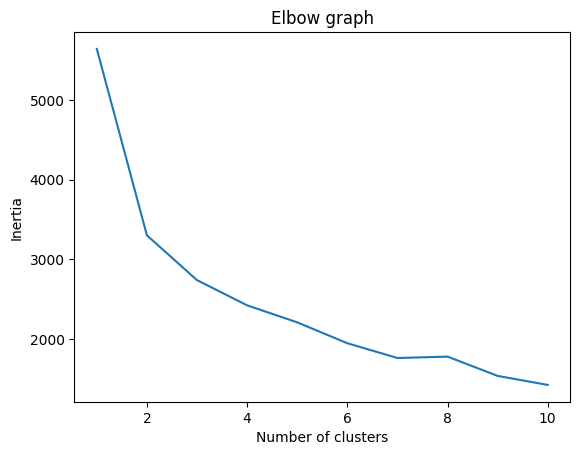

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.plot(range(1,11), inertia)
plt.title('Elbow graph')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show() #approprite cluster is two since the elbow dip is at 2

In [ ]:
 kmeans = KMeans(n_clusters=2, random_state=42)
 y = kmeans.fit_predict(norm_df)

In [ ]:
y[0:6]

array([0, 0, 1, 0, 1, 1], dtype=int32)

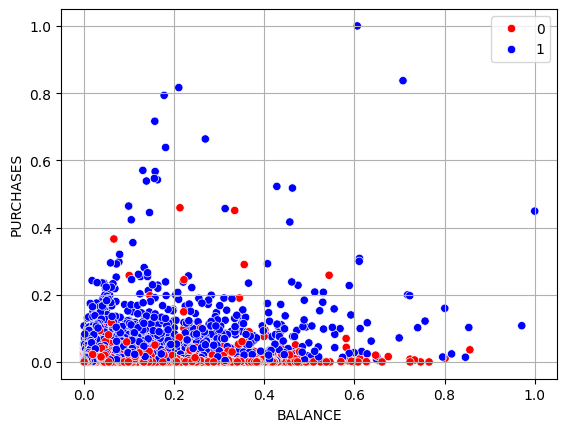

In [ ]:
sns.scatterplot(x='BALANCE',y='PURCHASES',data=norm_df,hue=y,palette=['r','b'])
plt.grid()
plt.show()


In [ ]:
norm_df.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')